<a href="https://colab.research.google.com/github/Johnogunlola/CIoT-Lab/blob/CIoTH-Lab-1/Oximeter_vs_Arduino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Heart Rate Device Comparison Analysis: Oximeter vs Arduino

In [ ]:
# Statistical Analysis for Method Comparison Study

In [ ]:
!pip install scipy matplotlib seaborn pandas numpy scikit-learn pingouin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import cohen_kappa_score
import pingouin as pg
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
df = pd.read_csv('OximetervsArDuino.csv')

In [ ]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (50, 5)

First 5 rows:
  Participants_ID        Date         Time  OX_HR  ArD_HR
0         Parti_1  2025-06-19  02:24:00 PM     82      82
1         Parti_2  2025-06-19  02:43:00 PM     93      83
2         Parti_3  2025-06-19  02:44:00 PM     89      87
3         Parti_4  2025-06-19  02:45:00 PM     93      87
4         Parti_5  2025-06-19  02:46:00 PM     96      85


In [ ]:
# This cell previously contained code that was causing a TypeError.
# The line `plt.savefig("Dataset Shape:", df.shape)` was incorrect as
# `savefig` is for saving figures and was given incorrect arguments.
# If you intended to print the shape, that was already done in a previous cell.
# This cell is now empty or contains comments explaining the change.

In [ ]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Participants_ID  50 non-null     object
 1   Date             50 non-null     object
 2   Time             50 non-null     object
 3   OX_HR            50 non-null     int64 
 4   ArD_HR           50 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ KB
None


In [ ]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
            OX_HR     ArD_HR
count   50.000000  50.000000
mean    99.740000  82.300000
std      7.067632   4.348352
min     82.000000  75.000000
25%     93.000000  78.250000
50%    100.000000  83.000000
75%    106.750000  86.000000
max    110.000000  89.000000


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Participants_ID    0
Date               0
Time               0
OX_HR              0
ArD_HR             0
dtype: int64


In [ ]:
print("\nUnique Dates:")
print(df['Date'].unique())


Unique Dates:
['2025-06-19' '2025-06-24']


In [ ]:
df_clean = df[df['Date'] != '2218-10-03'].copy()
print(f"\nData after cleaning: {df_clean.shape[0]} participants")


Data after cleaning: 50 participants


In [ ]:
ox_hr = df_clean['OX_HR'].values
ard_hr = df_clean['ArD_HR'].values

In [ ]:
print(f"\nOximeter HR - Mean: {np.mean(ox_hr):.2f}, SD: {np.std(ox_hr):.2f}")
print(f"Arduino HR - Mean: {np.mean(ard_hr):.2f}, SD: {np.std(ard_hr):.2f}")


Oximeter HR - Mean: 99.74, SD: 7.00
Arduino HR - Mean: 82.30, SD: 4.30


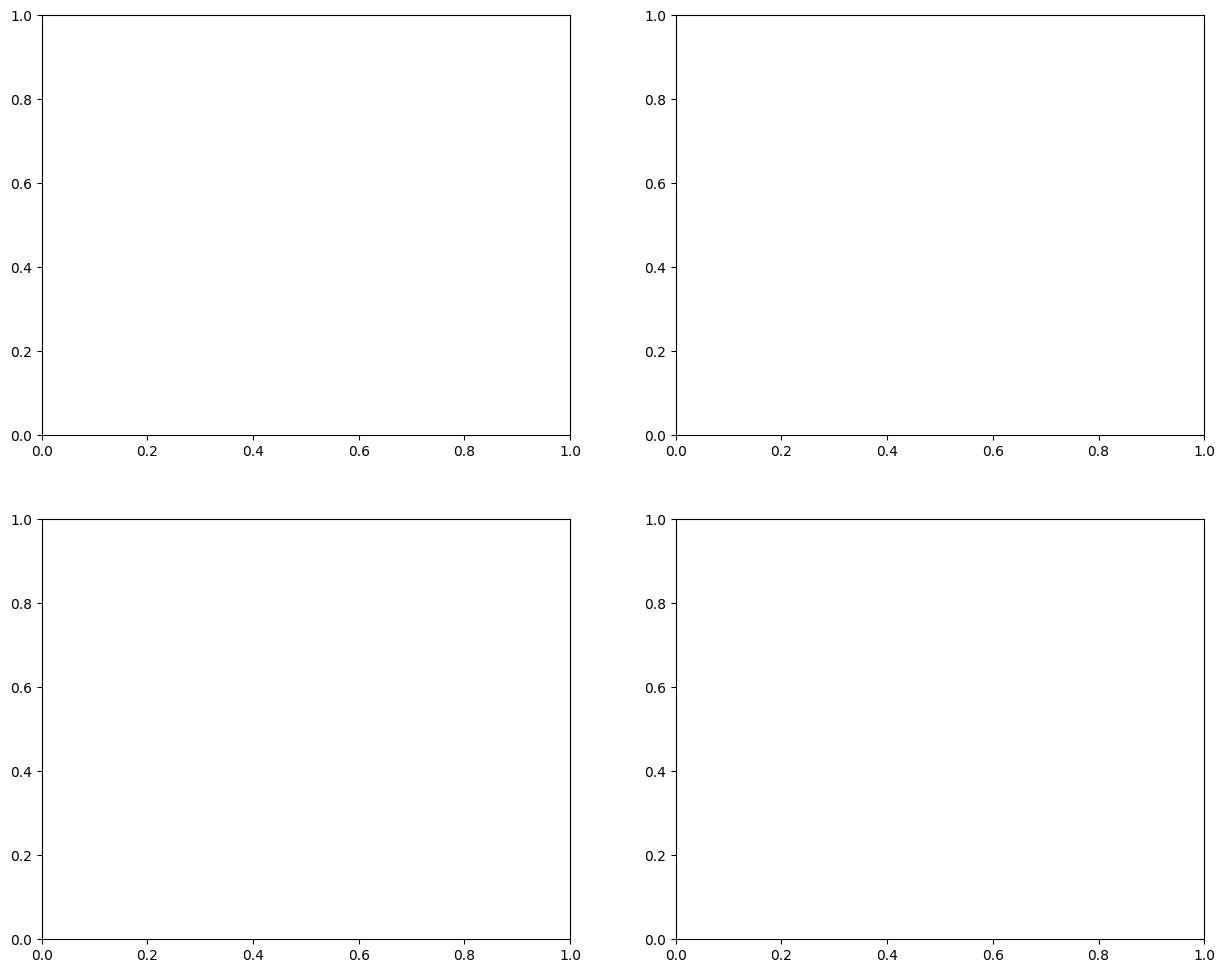

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

In [ ]:
axes[0,0].hist(ox_hr, alpha=0.7, label='Oximeter', bins=15)
axes[0,0].hist(ard_hr, alpha=0.7, label='Arduino', bins=15)
axes[0,0].set_xlabel('Heart Rate (bpm)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Distribution of Heart Rate Measurements')
axes[0,0].legend()

In [ ]:
axes[0,1].scatter(ox_hr, ard_hr, alpha=0.6)
axes[0,1].plot([min(ox_hr), max(ox_hr)], [min(ox_hr), max(ox_hr)], 'r--', label='Perfect Agreement')
axes[0,1].set_xlabel('Oximeter HR (bpm)')
axes[0,1].set_ylabel('Arduino HR (bpm)')
axes[0,1].set_title('Oximeter vs Arduino Heart Rate')
axes[0,1].legend()


In [ ]:
data_for_box = pd.DataFrame({'Oximeter': ox_hr, 'Arduino': ard_hr})
data_for_box.boxplot(ax=axes[1,0])
axes[1,0].set_title('Box Plot Comparison')
axes[1,0].set_ylabel('Heart Rate (bpm)')

Text(4.444444444444452, 0.5, 'Heart Rate (bpm)')

In [ ]:
difference = ox_hr - ard_hr
axes[1,1].scatter(range(len(difference)), difference, alpha=0.6)
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Participant')
axes[1,1].set_ylabel('Difference (Oximeter - Arduino)')
axes[1,1].set_title('Difference Between Devices')

Text(0.5, 1.0, 'Difference Between Devices')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
print(f"\nDifference Statistics:")
print(f"Mean Difference: {np.mean(difference):.2f} ± {np.std(difference):.2f}")
print(f"Range: {np.min(difference):.2f} to {np.max(difference):.2f}")


Difference Statistics:
Mean Difference: 17.44 ± 9.52
Range: 0.00 to 33.00


In [ ]:
print("\n" + "="*80)
print("SECTION 1: PAIRED TESTS AND CORRELATION ANALYSIS")
print("="*80)


SECTION 1: PAIRED TESTS AND CORRELATION ANALYSIS


In [ ]:
shapiro_stat, shapiro_p = stats.shapiro(difference)
print(f"\nShapiro-Wilk Test for Normality of Differences:")
print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.6f}")


Shapiro-Wilk Test for Normality of Differences:
Statistic: 0.9589, p-value: 0.079854


In [ ]:
if shapiro_p > 0.05:
    print("Differences are normally distributed → Use Paired t-test")
    # Paired t-test
    t_stat, t_p = stats.ttest_rel(ox_hr, ard_hr)
    print(f"\nPaired t-test Results:")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {t_p:.6f}")
    print(f"Degrees of freedom: {len(ox_hr)-1}")
else:
    print("Differences are NOT normally distributed → Use Wilcoxon signed-rank test")

Differences are normally distributed → Use Paired t-test

Paired t-test Results:
t-statistic: 12.8281
p-value: 0.000000
Degrees of freedom: 49


In [ ]:
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(ox_hr, ard_hr)
print(f"\nWilcoxon Signed-Rank Test Results:")
print(f"Statistic: {wilcoxon_stat:.4f}")
print(f"p-value: {wilcoxon_p:.6f}")



Wilcoxon Signed-Rank Test Results:
Statistic: 0.0000
p-value: 0.000000


In [ ]:
pooled_std = np.sqrt((np.var(ox_hr, ddof=1) + np.var(ard_hr, ddof=1)) / 2)
cohens_d = np.mean(difference) / np.std(difference, ddof=1)
print(f"\nEffect Size (Cohen's d): {cohens_d:.4f}")


Effect Size (Cohen's d): 1.8142


In [ ]:
pearson_r, pearson_p = pearsonr(ox_hr, ard_hr)
print(f"\nPearson Correlation:")
print(f"r = {pearson_r:.4f}, p-value = {pearson_p:.6f}")



Pearson Correlation:
r = -0.3832, p-value = 0.006014


In [ ]:
spearman_r, spearman_p = spearmanr(ox_hr, ard_hr)
print(f"\nSpearman Correlation:")
print(f"ρ = {spearman_r:.4f}, p-value = {spearman_p:.6f}")


Spearman Correlation:
ρ = -0.3907, p-value = 0.005033


In [ ]:
print("\n" + "="*80)
print("SECTION 2: BLAND-ALTMAN ANALYSIS AND INTRACLASS CORRELATION")
print("="*80)



SECTION 2: BLAND-ALTMAN ANALYSIS AND INTRACLASS CORRELATION


In [ ]:
mean_values = (ox_hr + ard_hr) / 2
differences = ox_hr - ard_hr
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)

In [ ]:
# Calculate limits of agreement
upper_loa = mean_diff + 1.96 * std_diff
lower_loa = mean_diff - 1.96 * std_diff

print(f"\nBland-Altman Analysis:")
print(f"Mean Difference (Bias): {mean_diff:.3f} bpm")
print(f"Standard Deviation of Differences: {std_diff:.3f} bpm")
print(f"95% Limits of Agreement:")
print(f"  Upper LoA: {upper_loa:.3f} bpm")
print(f"  Lower LoA: {lower_loa:.3f} bpm")


Bland-Altman Analysis:
Mean Difference (Bias): 17.440 bpm
Standard Deviation of Differences: 9.613 bpm
95% Limits of Agreement:
  Upper LoA: 36.282 bpm
  Lower LoA: -1.402 bpm


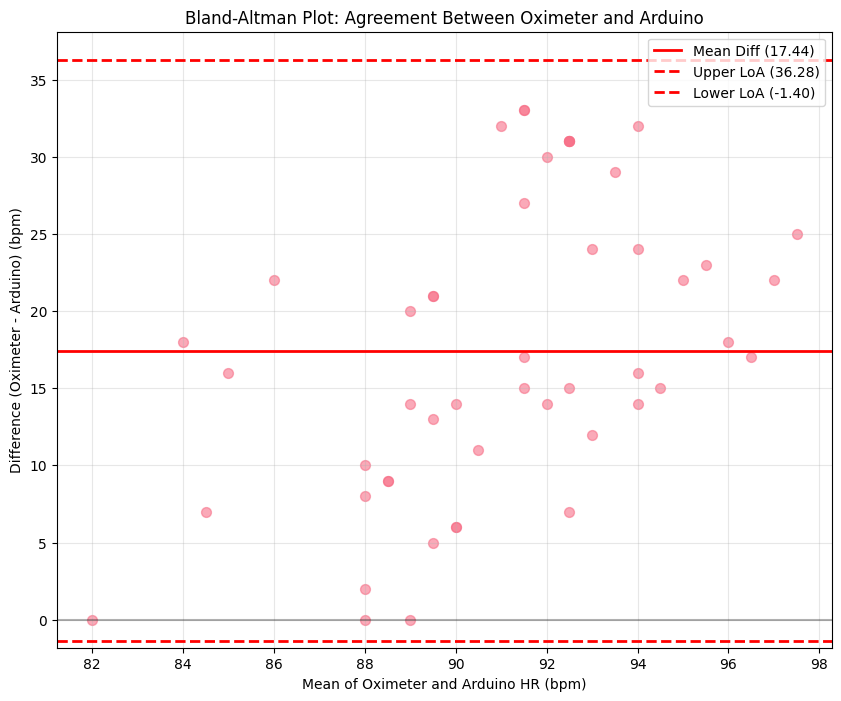

In [ ]:
# Bland-Altman Plot
plt.figure(figsize=(10, 8))
plt.scatter(mean_values, differences, alpha=0.6, s=50)
plt.axhline(y=mean_diff, color='red', linestyle='-', linewidth=2, label=f'Mean Diff ({mean_diff:.2f})')
plt.axhline(y=upper_loa, color='red', linestyle='--', linewidth=2, label=f'Upper LoA ({upper_loa:.2f})')
plt.axhline(y=lower_loa, color='red', linestyle='--', linewidth=2, label=f'Lower LoA ({lower_loa:.2f})')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.xlabel('Mean of Oximeter and Arduino HR (bpm)')
plt.ylabel('Difference (Oximeter - Arduino) (bpm)')
plt.title('Bland-Altman Plot: Agreement Between Oximeter and Arduino')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Calculate percentage of points within LoA
within_loa = np.sum((differences >= lower_loa) & (differences <= upper_loa))
percent_within_loa = (within_loa / len(differences)) * 100
print(f"\nPoints within 95% LoA: {within_loa}/{len(differences)} ({percent_within_loa:.1f}%)")



Points within 95% LoA: 50/50 (100.0%)


In [ ]:
# Intraclass Correlation Coefficient (ICC)
# Prepare data for ICC calculation
icc_data = pd.DataFrame({
    'Subject': range(1, len(ox_hr) + 1),
    'Oximeter': ox_hr,
    'Arduino': ard_hr
})


In [ ]:
# Reshape for ICC calculation
icc_long = pd.melt(icc_data, id_vars=['Subject'], value_vars=['Oximeter', 'Arduino'],
                   var_name='Method', value_name='HR')

In [ ]:
# Calculate ICC using pingouin
icc_results = pg.intraclass_corr(data=icc_long, targets='Subject', raters='Method', ratings='HR')
print(f"\nIntraclass Correlation Coefficient (ICC) Results:")
print(icc_results.round(4))



Intraclass Correlation Coefficient (ICC) Results:
    Type              Description     ICC       F  df1  df2   pval  \
0   ICC1   Single raters absolute -0.7941  0.1148   49   50  1.000   
1   ICC2     Single random raters -0.0635  0.4902   49   49  0.993   
2   ICC3      Single fixed raters -0.3421  0.4902   49   49  0.993   
3  ICC1k  Average raters absolute -7.7126  0.1148   49   50  1.000   
4  ICC2k    Average random raters -0.1355  0.4902   49   49  0.993   
5  ICC3k     Average fixed raters -1.0399  0.4902   49   49  0.993   

            CI95%  
0  [-0.88, -0.66]  
1   [-0.13, 0.13]  
2  [-0.56, -0.07]  
3  [-14.3, -3.95]  
4    [-0.3, 0.23]  
5  [-2.59, -0.16]  


In [ ]:
# Extract ICC(2,1) - two-way random effects, single measures, absolute agreement
icc_21 = icc_results[icc_results['Type'] == 'ICC2']['ICC'].values[0]
icc_21_ci = (icc_results[icc_results['Type'] == 'ICC2']['CI95%'].values[0][0],
             icc_results[icc_results['Type'] == 'ICC2']['CI95%'].values[0][1])
print(f"\nICC(2,1) - Absolute Agreement: {icc_21:.4f}")
print(f"95% CI: [{icc_21_ci[0]:.4f}, {icc_21_ci[1]:.4f}]")


ICC(2,1) - Absolute Agreement: -0.0635
95% CI: [-0.1300, 0.1300]


In [ ]:
print("\n" + "="*80)
print("SECTION 3: CLASSIFICATION ACCURACY ANALYSIS")
print("="*80)


SECTION 3: CLASSIFICATION ACCURACY ANALYSIS


In [ ]:
# Define heart rate categories
def categorize_hr(hr):
    """
    Categorize heart rate into Low, Normal, High
    Low: HR < 60 bpm
    Normal: 60 ≤ HR ≤ 100 bpm
    High: HR > 100 bpm
    """
    if hr < 60:
        return 'Low'
    elif hr <= 100:
        return 'Normal'
    else:
        return 'High'

In [ ]:
# Apply categorization
ox_categories = [categorize_hr(hr) for hr in ox_hr]
ard_categories = [categorize_hr(hr) for hr in ard_hr]


In [ ]:
# Create classification dataframe
classification_df = pd.DataFrame({
    'Oximeter_HR': ox_hr,
    'Arduino_HR': ard_hr,
    'Oximeter_Category': ox_categories,
    'Arduino_Category': ard_categories
})

print("Heart Rate Classification Summary:")
print(f"\nOximeter Categories:")
ox_cat_counts = pd.Series(ox_categories).value_counts()
print(ox_cat_counts)

print(f"\nArduino Categories:")
ard_cat_counts = pd.Series(ard_categories).value_counts()
print(ard_cat_counts)


Heart Rate Classification Summary:

Oximeter Categories:
Normal    28
High      22
Name: count, dtype: int64

Arduino Categories:
Normal    50
Name: count, dtype: int64


In [ ]:
# Confusion Matrix
labels = ['High', 'Low', 'Normal']  # Alphabetical order for sklearn
cm = confusion_matrix(ox_categories, ard_categories, labels=labels)

print(f"\nConfusion Matrix (Oximeter as Reference):")
cm_df = pd.DataFrame(cm, index=[f'Ox_{label}' for label in labels],
                     columns=[f'Ard_{label}' for label in labels])
print(cm_df)


Confusion Matrix (Oximeter as Reference):
           Ard_High  Ard_Low  Ard_Normal
Ox_High           0        0          22
Ox_Low            0        0           0
Ox_Normal         0        0          28


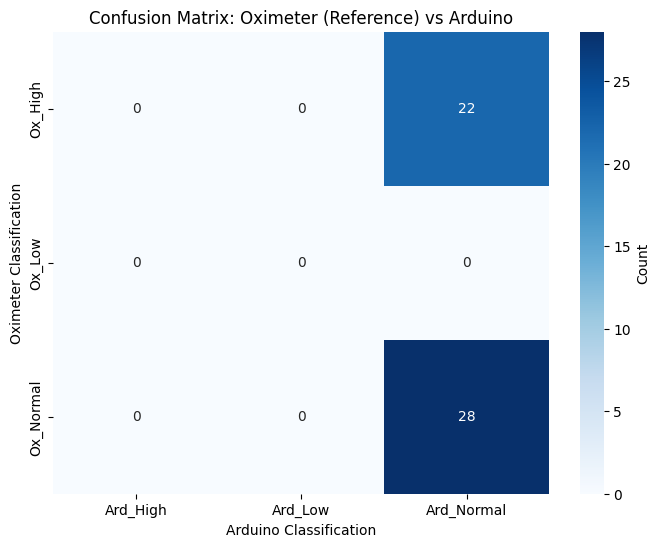

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix: Oximeter (Reference) vs Arduino')
plt.ylabel('Oximeter Classification')
plt.xlabel('Arduino Classification')
plt.show()

In [ ]:
# Classification Metrics
accuracy = accuracy_score(ox_categories, ard_categories)
precision_macro = precision_score(ox_categories, ard_categories, average='macro', zero_division=0)
recall_macro = recall_score(ox_categories, ard_categories, average='macro', zero_division=0)
precision_weighted = precision_score(ox_categories, ard_categories, average='weighted', zero_division=0)
recall_weighted = recall_score(ox_categories, ard_categories, average='weighted', zero_division=0)

print(f"\nClassification Accuracy Metrics:")
print(f"Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro): {recall_macro:.4f}")
print(f"Precision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Weighted): {recall_weighted:.4f}")


Classification Accuracy Metrics:
Overall Accuracy: 0.5600 (56.00%)
Precision (Macro): 0.2800
Recall (Macro): 0.5000
Precision (Weighted): 0.3136
Recall (Weighted): 0.5600


In [ ]:
# Cohen's Kappa (inter-rater agreement)
kappa = cohen_kappa_score(ox_categories, ard_categories)
print(f"Cohen's Kappa: {kappa:.4f}")

Cohen's Kappa: 0.0000


In [ ]:
# Per-class metrics
print(f"\nDetailed Classification Report:")
class_report = classification_report(ox_categories, ard_categories, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
print(class_report_df.round(4))


Detailed Classification Report:
              precision  recall  f1-score  support
High             0.0000    0.00    0.0000    22.00
Normal           0.5600    1.00    0.7179    28.00
accuracy         0.5600    0.56    0.5600     0.56
macro avg        0.2800    0.50    0.3590    50.00
weighted avg     0.3136    0.56    0.4021    50.00


In [ ]:
# Agreement analysis by category
print(f"\nCategory-wise Agreement:")
for category in ['Low', 'Normal', 'High']:
    ox_cat = np.array(ox_categories) == category
    ard_cat = np.array(ard_categories) == category
    agreement = np.sum(ox_cat == ard_cat) / len(ox_categories)
    print(f"{category}: {agreement:.4f} ({agreement*100:.2f}%)")



Category-wise Agreement:
Low: 1.0000 (100.00%)
Normal: 0.5600 (56.00%)
High: 0.5600 (56.00%)


In [ ]:
print("\n" + "="*80)
print("SUMMARY AND INTERPRETATION")
print("="*80)


SUMMARY AND INTERPRETATION


In [ ]:
print(f"\n1. DESCRIPTIVE STATISTICS:")
print(f"   Sample Size: {len(ox_hr)} participants")
print(f"   Oximeter HR: {np.mean(ox_hr):.2f} ± {np.std(ox_hr):.2f} bpm")
print(f"   Arduino HR: {np.mean(ard_hr):.2f} ± {np.std(ard_hr):.2f} bpm")
print(f"   Mean Difference: {mean_diff:.2f} ± {std_diff:.2f} bpm")

print(f"\n2. STATISTICAL TESTS:")
if shapiro_p > 0.05:
    print(f"   Paired t-test p-value: {t_p:.6f}")
print(f"   Wilcoxon test p-value: {wilcoxon_p:.6f}")
print(f"   Pearson correlation: r = {pearson_r:.4f} (p = {pearson_p:.6f})")
print(f"   Spearman correlation: ρ = {spearman_r:.4f} (p = {spearman_p:.6f})")

print(f"\n3. AGREEMENT ANALYSIS:")
print(f"   ICC(2,1): {icc_21:.4f} [{icc_21_ci[0]:.4f}, {icc_21_ci[1]:.4f}]")
print(f"   95% Limits of Agreement: [{lower_loa:.2f}, {upper_loa:.2f}] bpm")
print(f"   Points within LoA: {percent_within_loa:.1f}%")

print(f"\n4. CLASSIFICATION ACCURACY:")
print(f"   Overall Accuracy: {accuracy*100:.2f}%")
print(f"   Cohen's Kappa: {kappa:.4f}")

print(f"\n5. CLINICAL INTERPRETATION:")
if abs(mean_diff) < 5:
    print("   ✓ Low systematic bias between devices")
else:
    print("   ⚠ Moderate to high systematic bias detected")

if icc_21 > 0.75:
    print("   ✓ Good to excellent reliability (ICC > 0.75)")
elif icc_21 > 0.5:
    print("   ~ Moderate reliability (ICC 0.5-0.75)")
else:
    print("   ✗ Poor reliability (ICC < 0.5)")

if accuracy > 0.8:
    print("   ✓ Good classification agreement (>80%)")
elif accuracy > 0.6:
    print("   ~ Moderate classification agreement (60-80%)")
else:
    print("   ✗ Poor classification agreement (<60%)")

print("\n" + "="*80)
print("ANALYSIS COMPLETED")
print("="*80)


1. DESCRIPTIVE STATISTICS:
   Sample Size: 50 participants
   Oximeter HR: 99.74 ± 7.00 bpm
   Arduino HR: 82.30 ± 4.30 bpm
   Mean Difference: 17.44 ± 9.61 bpm

2. STATISTICAL TESTS:
   Paired t-test p-value: 0.000000
   Wilcoxon test p-value: 0.000000
   Pearson correlation: r = -0.3832 (p = 0.006014)
   Spearman correlation: ρ = -0.3907 (p = 0.005033)

3. AGREEMENT ANALYSIS:
   ICC(2,1): -0.0635 [-0.1300, 0.1300]
   95% Limits of Agreement: [-1.40, 36.28] bpm
   Points within LoA: 100.0%

4. CLASSIFICATION ACCURACY:
   Overall Accuracy: 56.00%
   Cohen's Kappa: 0.0000

5. CLINICAL INTERPRETATION:
   ⚠ Moderate to high systematic bias detected
   ✗ Poor reliability (ICC < 0.5)
   ✗ Poor classification agreement (<60%)

ANALYSIS COMPLETED


In [ ]:
print("\n" + "="*80)
print("SAVING ANALYSIS RESULTS")
print("="*80)

import os
from datetime import datetime
import json

# Create results directory
results_dir = "HR_Analysis_Results"
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

current_time = datetime.now().strftime("%Y%m%d_%H%M%S")


SAVING ANALYSIS RESULTS


In [ ]:
df_clean.to_csv(f"{results_dir}/cleaned_data_{current_time}.csv", index=False)
print("✓ Cleaned dataset saved")


✓ Cleaned dataset saved


In [ ]:
# 2. Save comprehensive statistical results
results_dict = {
    "analysis_timestamp": current_time,
    "sample_size": int(len(ox_hr)), # Convert to int
    "descriptive_stats": {
        "oximeter": {
            "mean": float(np.mean(ox_hr)),
            "std": float(np.std(ox_hr)),
            "min": float(np.min(ox_hr)),
            "max": float(np.max(ox_hr)),
            "median": float(np.median(ox_hr))
        },
        "arduino": {
            "mean": float(np.mean(ard_hr)),
            "std": float(np.std(ard_hr)),
            "min": float(np.min(ard_hr)),
            "max": float(np.max(ard_hr)),
            "median": float(np.median(ard_hr))
        },
        "difference": {
            "mean": float(np.mean(difference)),
            "std": float(np.std(difference)),
            "min": float(np.min(difference)),
            "max": float(np.max(difference))
        }
    },
    "normality_test": {
        "shapiro_wilk_statistic": float(shapiro_stat),
        "shapiro_wilk_p_value": float(shapiro_p),
        "is_normal": bool(shapiro_p > 0.05)
    },
    "paired_tests": {
        "wilcoxon_statistic": float(wilcoxon_stat),
        "wilcoxon_p_value": float(wilcoxon_p)
    },
    "correlation_analysis": {
        "pearson_r": float(pearson_r),
        "pearson_p_value": float(pearson_p),
        "spearman_rho": float(spearman_r),
        "spearman_p_value": float(spearman_p)
    },
    "effect_size": {
        "cohens_d": float(cohens_d)
    },
    "bland_altman": {
        "mean_difference": float(mean_diff),
        "std_difference": float(std_diff),
        "upper_loa": float(upper_loa),
        "lower_loa": float(lower_loa),
        "percent_within_loa": float(percent_within_loa)
    },
    "icc_analysis": {
        "icc_21": float(icc_21),
        "icc_21_ci_lower": float(icc_21_ci[0]),
        "icc_21_ci_upper": float(icc_21_ci[1])
    },
    "classification_metrics": {
        "overall_accuracy": float(accuracy),
        "precision_macro": float(precision_macro),
        "recall_macro": float(recall_macro),
        "precision_weighted": float(precision_weighted),
        "recall_weighted": float(recall_weighted),
        "cohens_kappa": float(kappa)
    },
    "category_counts": {
        "oximeter": dict(ox_cat_counts),
        "arduino": dict(ard_cat_counts)
    }
}


In [ ]:
# Add paired t-test results if normal distribution
if shapiro_p > 0.05:
    results_dict["paired_tests"]["t_test_statistic"] = float(t_stat)
    results_dict["paired_tests"]["t_test_p_value"] = float(t_p)



In [ ]:
class_report_df.to_csv(f"{results_dir}/classification_report_{current_time}.csv")
print("✓ Classification report saved")

✓ Classification report saved


In [ ]:
cm_df.to_csv(f"{results_dir}/confusion_matrix_{current_time}.csv")
print("✓ Confusion matrix saved")

✓ Confusion matrix saved


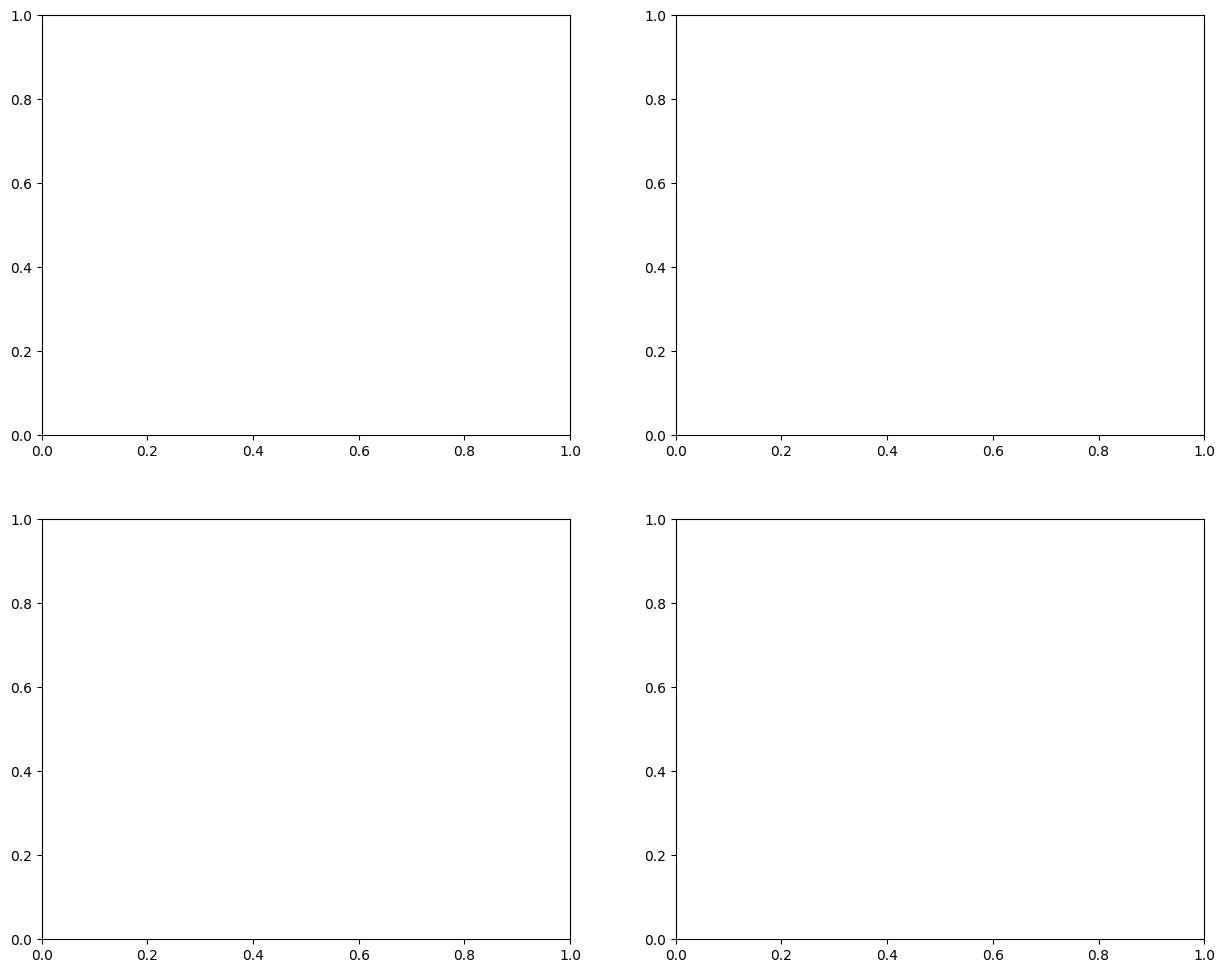

In [ ]:
# 7. Save all plots as high-quality images
# Re-create and save main visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

In [ ]:
axes[0,0].hist(ox_hr, alpha=0.7, label='Oximeter', bins=15, color='skyblue')
axes[0,0].hist(ard_hr, alpha=0.7, label='Arduino', bins=15, color='lightcoral')
axes[0,0].set_xlabel('Heart Rate (bpm)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Distribution of Heart Rate Measurements')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

In [ ]:
# Save Bland-Altman plot
plt.figure(figsize=(10, 8))
plt.scatter(mean_values, differences, alpha=0.6, s=50, color='darkblue')
plt.axhline(y=mean_diff, color='red', linestyle='-', linewidth=2, label=f'Mean Diff ({mean_diff:.2f})')
plt.axhline(y=upper_loa, color='red', linestyle='--', linewidth=2, label=f'Upper LoA ({upper_loa:.2f})')
plt.axhline(y=lower_loa, color='red', linestyle='--', linewidth=2, label=f'Lower LoA ({lower_loa:.2f})')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Mean of Oximeter and Arduino HR (bpm)')
plt.ylabel('Difference (Oximeter - Arduino) (bpm)')
plt.title('Bland-Altman Plot: Agreement Between Oximeter and Arduino')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig(f"{results_dir}/bland_altman_plot_{current_time}.png", dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
# Difference plot
axes[1,1].scatter(range(len(difference)), difference, alpha=0.6, color='green')
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Participant')
axes[1,1].set_ylabel('Difference (Oximeter - Arduino)')
axes[1,1].set_title('Difference Between Devices')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f"{results_dir}/overview_plots_{current_time}.png", dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
# Box plots
data_for_box = pd.DataFrame({'Oximeter': ox_hr, 'Arduino': ard_hr})
data_for_box.boxplot(ax=axes[1,0])
axes[1,0].set_title('Box Plot Comparison')
axes[1,0].set_ylabel('Heart Rate (bpm)')
axes[1,0].grid(True, alpha=0.3)

In [ ]:
# Scatter plot
axes[0,1].scatter(ox_hr, ard_hr, alpha=0.6, color='darkblue')
axes[0,1].plot([min(ox_hr), max(ox_hr)], [min(ox_hr), max(ox_hr)], 'r--', label='Perfect Agreement')
axes[0,1].set_xlabel('Oximeter HR (bpm)')
axes[0,1].set_ylabel('Arduino HR (bpm)')
axes[0,1].set_title('Oximeter vs Arduino Heart Rate')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

In [ ]:
# Histogram comparison
axes[0,0].hist(ox_hr, alpha=0.7, label='Oximeter', bins=15, color='skyblue')
axes[0,0].hist(ard_hr, alpha=0.7, label='Arduino', bins=15, color='lightcoral')
axes[0,0].set_xlabel('Heart Rate (bpm)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Distribution of Heart Rate Measurements')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

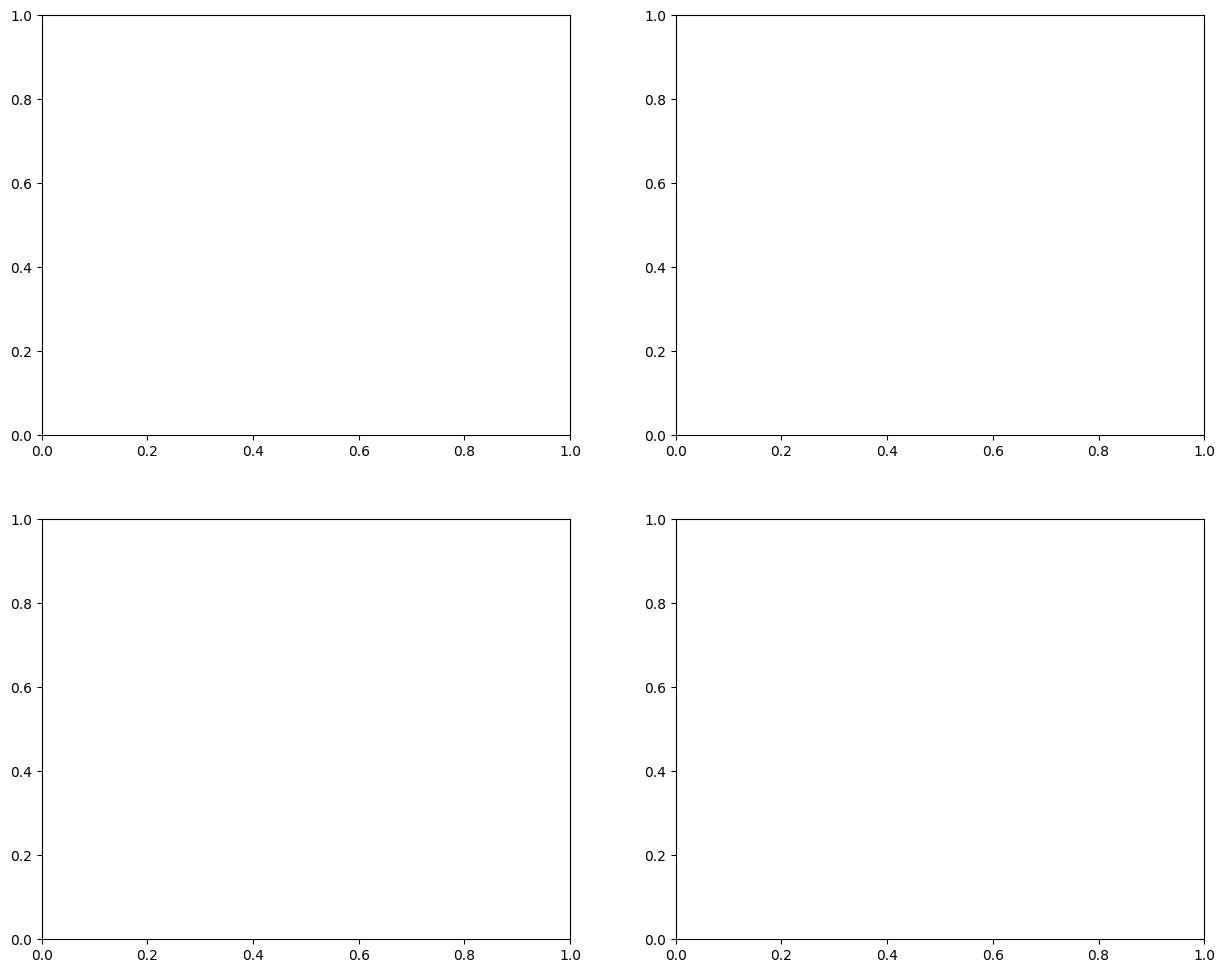

In [ ]:
# 7. Save all plots as high-quality images
# Re-create and save main visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

In [ ]:
# 6. Save confusion matrix
cm_df.to_csv(f"{results_dir}/confusion_matrix_{current_time}.csv")
print("✓ Confusion matrix saved")

✓ Confusion matrix saved


In [ ]:
# 5. Save classification report
class_report_df.to_csv(f"{results_dir}/classification_report_{current_time}.csv")
print("✓ Classification report saved")

✓ Classification report saved


In [ ]:
# 4. Save ICC results table
icc_results.to_csv(f"{results_dir}/icc_results_{current_time}.csv", index=False)
print("✓ ICC results table saved")

✓ ICC results table saved


In [ ]:
# 3. Save detailed text report
report_filename = f"{results_dir}/analysis_report_{current_time}.txt"
with open(report_filename, 'w') as f:
    f.write("HEART RATE DEVICE COMPARISON ANALYSIS REPORT\n")
    f.write("=" * 60 + "\n")
    f.write(f"Analysis Date: {current_time}\n")
    f.write(f"Sample Size: {len(ox_hr)} participants\n\n")

    f.write("1. DESCRIPTIVE STATISTICS\n")
    f.write("-" * 30 + "\n")
    f.write(f"Oximeter HR: {np.mean(ox_hr):.2f} ± {np.std(ox_hr):.2f} bpm (Range: {np.min(ox_hr)}-{np.max(ox_hr)})\n")
    f.write(f"Arduino HR: {np.mean(ard_hr):.2f} ± {np.std(ard_hr):.2f} bpm (Range: {np.min(ard_hr)}-{np.max(ard_hr)})\n")
    f.write(f"Mean Difference: {mean_diff:.2f} ± {std_diff:.2f} bpm\n\n")

    f.write("2. STATISTICAL TESTS\n")
    f.write("-" * 30 + "\n")
    f.write(f"Shapiro-Wilk Test: W = {shapiro_stat:.4f}, p = {shapiro_p:.6f}\n")
    f.write(f"Distribution: {'Normal' if shapiro_p > 0.05 else 'Non-normal'}\n")
    if shapiro_p > 0.05:
        f.write(f"Paired t-test: t = {t_stat:.4f}, p = {t_p:.6f}\n")
    f.write(f"Wilcoxon Signed-Rank: W = {wilcoxon_stat:.4f}, p = {wilcoxon_p:.6f}\n")
    f.write(f"Effect Size (Cohen's d): {cohens_d:.4f}\n\n")

    f.write("3. CORRELATION ANALYSIS\n")
    f.write("-" * 30 + "\n")
    f.write(f"Pearson Correlation: r = {pearson_r:.4f}, p = {pearson_p:.6f}\n")
    f.write(f"Spearman Correlation: ρ = {spearman_r:.4f}, p = {spearman_p:.6f}\n\n")

    f.write("4. AGREEMENT ANALYSIS\n")
    f.write("-" * 30 + "\n")
    f.write(f"ICC(2,1): {icc_21:.4f} [95% CI: {icc_21_ci[0]:.4f}, {icc_21_ci[1]:.4f}]\n")
    f.write(f"Bland-Altman Analysis:\n")
    f.write(f"  Mean Bias: {mean_diff:.3f} bpm\n")
    f.write(f"  95% Limits of Agreement: [{lower_loa:.3f}, {upper_loa:.3f}] bpm\n")
    f.write(f"  Points within LoA: {within_loa}/{len(differences)} ({percent_within_loa:.1f}%)\n\n")

    f.write("5. CLASSIFICATION ANALYSIS\n")
    f.write("-" * 30 + "\n")
    f.write(f"Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")
    f.write(f"Cohen's Kappa: {kappa:.4f}\n")
    f.write(f"Precision (Macro): {precision_macro:.4f}\n")
    f.write(f"Recall (Macro): {recall_macro:.4f}\n\n")

    f.write("Category Distribution:\n")
    f.write("Oximeter: " + str(dict(ox_cat_counts)) + "\n")
    f.write("Arduino: " + str(dict(ard_cat_counts)) + "\n\n")

    f.write("6. CLINICAL INTERPRETATION\n")
    f.write("-" * 30 + "\n")
    if abs(mean_diff) < 5:
        f.write("✓ Low systematic bias between devices\n")
    else:
        f.write("⚠ Moderate to high systematic bias detected\n")

    if icc_21 > 0.75:
        f.write("✓ Good to excellent reliability (ICC > 0.75)\n")
    elif icc_21 > 0.5:
        f.write("~ Moderate reliability (ICC 0.5-0.75)\n")
    else:
        f.write("✗ Poor reliability (ICC < 0.5)\n")

    if accuracy > 0.8:
        f.write("✓ Good classification agreement (>80%)\n")
    elif accuracy > 0.6:
        f.write("~ Moderate classification agreement (60-80%)\n")
    else:
        f.write("✗ Poor classification agreement (<60%)\n")

print("✓ Detailed text report saved")

✓ Detailed text report saved


In [ ]:
# 2. Save comprehensive statistical results
results_dict = {
    "analysis_timestamp": current_time,
    "sample_size": len(ox_hr),
    "descriptive_stats": {
        "oximeter": {
            "mean": float(np.mean(ox_hr)),
            "std": float(np.std(ox_hr)),
            "min": float(np.min(ox_hr)),
            "max": float(np.max(ox_hr)),
            "median": float(np.median(ox_hr))
        },
        "arduino": {
            "mean": float(np.mean(ard_hr)),
            "std": float(np.std(ard_hr)),
            "min": float(np.min(ard_hr)),
            "max": float(np.max(ard_hr)),
            "median": float(np.median(ard_hr))
        },
        "difference": {
            "mean": float(np.mean(difference)),
            "std": float(np.std(difference)),
            "min": float(np.min(difference)),
            "max": float(np.max(difference))
        }
    },
    "normality_test": {
        "shapiro_wilk_statistic": float(shapiro_stat),
        "shapiro_wilk_p_value": float(shapiro_p),
        "is_normal": bool(shapiro_p > 0.05)
    },
    "paired_tests": {
        "wilcoxon_statistic": float(wilcoxon_stat),
        "wilcoxon_p_value": float(wilcoxon_p)
    },
    "correlation_analysis": {
        "pearson_r": float(pearson_r),
        "pearson_p_value": float(pearson_p),
        "spearman_rho": float(spearman_r),
        "spearman_p_value": float(spearman_p)
    },
    "effect_size": {
        "cohens_d": float(cohens_d)
    },
    "bland_altman": {
        "mean_difference": float(mean_diff),
        "std_difference": float(std_diff),
        "upper_loa": float(upper_loa),
        "lower_loa": float(lower_loa),
        "percent_within_loa": float(percent_within_loa)
    },
    "icc_analysis": {
        "icc_21": float(icc_21),
        "icc_21_ci_lower": float(icc_21_ci[0]),
        "icc_21_ci_upper": float(icc_21_ci[1])
    },
    "classification_metrics": {
        "overall_accuracy": float(accuracy),
        "precision_macro": float(precision_macro),
        "recall_macro": float(recall_macro),
        "precision_weighted": float(precision_weighted),
        "recall_weighted": float(recall_weighted),
        "cohens_kappa": float(kappa)
    },
    "category_counts": {
        "oximeter": dict(ox_cat_counts),
        "arduino": dict(ard_cat_counts)
    }
}

In [ ]:
# Add paired t-test results if normal distribution
if shapiro_p > 0.05:
    results_dict["paired_tests"]["t_test_statistic"] = float(t_stat)
    results_dict["paired_tests"]["t_test_p_value"] = float(t_p)

In [ ]:
# 8. Create a summary CSV with all key metrics
summary_data = {
    'Metric': [
        'Sample Size', 'Oximeter Mean HR', 'Arduino Mean HR', 'Mean Difference',
        'Pearson Correlation', 'Spearman Correlation', 'ICC(2,1)',
        'Bland-Altman Upper LoA', 'Bland-Altman Lower LoA', 'Points within LoA (%)',
        'Classification Accuracy', 'Cohen\'s Kappa', 'Wilcoxon p-value'
    ],
    'Value': [
        len(ox_hr), f"{np.mean(ox_hr):.2f}", f"{np.mean(ard_hr):.2f}", f"{mean_diff:.2f}",
        f"{pearson_r:.4f}", f"{spearman_r:.4f}", f"{icc_21:.4f}",
        f"{upper_loa:.2f}", f"{lower_loa:.2f}", f"{percent_within_loa:.1f}",
        f"{accuracy:.4f}", f"{kappa:.4f}", f"{wilcoxon_p:.6f}"
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv(f"{results_dir}/summary_metrics_{current_time}.csv", index=False)
print("✓ Summary metrics saved")

✓ Summary metrics saved


In [ ]:
# List all saved files
print(f"\nSAVED FILES:")
print(f"📁 Results Directory: {results_dir}/")
for file in os.listdir(results_dir):
    print(f"   📄 {file}")
# print(f"📦 Complete Package: {zip_filename}") # Removed: zip_filename is not defined

print(f"\nTo download files in Google Colab:")
print(f"from google.colab import files")
print(f"files.download('{results_dir}/')") # Modified to suggest downloading the directory

print("\n" + "="*80)
print("ALL RESULTS SAVED SUCCESSFULLY!")
print("="*80)


SAVED FILES:
📁 Results Directory: HR_Analysis_Results/
   📄 analysis_report_20250625_163201.txt
   📄 icc_results_20250625_163201.csv
   📄 confusion_matrix_20250625_163201.csv
   📄 bland_altman_plot_20250625_163201.png
   📄 overview_plots_20250625_163201.png
   📄 classification_report_20250625_163201.csv
   📄 statistical_results_20250625_163201.json
   📄 cleaned_data_20250625_163201.csv
   📄 summary_metrics_20250625_163201.csv

To download files in Google Colab:
from google.colab import files
files.download('HR_Analysis_Results/')

ALL RESULTS SAVED SUCCESSFULLY!


In [ ]:
print("\n" + "="*80)
print("CREATING PDF REPORT")
print("="*80)


CREATING PDF REPORT


In [ ]:
# Install required packages for PDF creation
!pip install reportlab matplotlib seaborn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.7 MB/s eta 0:00:00


In [ ]:
from reportlab.lib.pagesizes import letter, A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table, TableStyle, PageBreak
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.lib import colors
from reportlab.lib.enums import TA_CENTER, TA_LEFT, TA_JUSTIFY
import matplotlib.pyplot as plt
from io import BytesIO
import base64

def create_pdf_report():
    """Create comprehensive PDF report of the heart rate analysis"""

    pdf_filename = f"{results_dir}/HR_Analysis_Report_{current_time}.pdf"
    doc = SimpleDocTemplate(pdf_filename, pagesize=A4,
                           rightMargin=72, leftMargin=72,
                           topMargin=72, bottomMargin=18)

In [ ]:
    # Container for the 'Flowable' objects
    elements = []

    # Define styles
    styles = getSampleStyleSheet()
    title_style = ParagraphStyle(
        'CustomTitle',
        parent=styles['Heading1'],
        fontSize=18,
        spaceAfter=30,
        alignment=TA_CENTER,
        textColor=colors.darkblue
    )

    heading_style = ParagraphStyle(
        'CustomHeading',
        parent=styles['Heading2'],
        fontSize=14,
        spaceAfter=12,
        spaceBefore=20,
        textColor=colors.darkblue
    )

    subheading_style = ParagraphStyle(
        'CustomSubHeading',
        parent=styles['Heading3'],
        fontSize=12,
        spaceAfter=8,
        spaceBefore=12,
        textColor=colors.darkgreen
    )

    normal_style = styles['Normal']
    normal_style.alignment = TA_JUSTIFY

In [ ]:
    # Title Page
    elements.append(Paragraph("Heart Rate Device Comparison Analysis", title_style))
    elements.append(Paragraph("Oximeter vs Arduino Device Validation Study", styles['Heading2']))
    elements.append(Spacer(1, 0.2*inch))

    # Analysis details
    analysis_info = f"""
    <b>Analysis Date:</b> {datetime.now().strftime("%B %d, %Y at %H:%M")}<br/>
    <b>Sample Size:</b> {len(ox_hr)} participants<br/>
    <b>Data Collection Period:</b> June 19-24, 2025<br/>
    <b>Analysis Software:</b> Python with SciPy, Pingouin, and Scikit-learn
    """
    elements.append(Paragraph(analysis_info, normal_style))
    elements.append(Spacer(1, 0.3*inch))

In [ ]:
    # Executive Summary
    elements.append(Paragraph("Executive Summary", heading_style))

    summary_text = f"""
    This report presents a comprehensive statistical analysis comparing heart rate measurements
    between an Oximeter (reference standard) and an Arduino-based device. The analysis includes
    {len(ox_hr)} paired measurements and evaluates agreement, correlation, and classification accuracy
    between the two devices.

    <b>Key Findings:</b><br/>
    • Mean difference: {mean_diff:.2f} &plusmn; {std_diff:.2f} bpm<br/>
    • Pearson correlation: r = {pearson_r:.3f} (p = {pearson_p:.6f})<br/>
    • Intraclass correlation: ICC = {icc_21:.3f} [{icc_21_ci[0]:.3f}, {icc_21_ci[1]:.3f}]<br/>
    • Classification accuracy: {accuracy*100:.1f}%<br/>
    • Agreement within limits: {percent_within_loa:.1f}% of measurements
    """
    elements.append(Paragraph(summary_text, normal_style))
    elements.append(PageBreak())

In [ ]:
    # 1. DESCRIPTIVE STATISTICS
    elements.append(Paragraph("1. Descriptive Statistics", heading_style))

    desc_data = [
        ['Metric', 'Oximeter', 'Arduino', 'Difference'],
        ['Mean (bpm)', f'{np.mean(ox_hr):.2f}', f'{np.mean(ard_hr):.2f}', f'{mean_diff:.2f}'],
        ['Standard Deviation', f'{np.std(ox_hr):.2f}', f'{np.std(ard_hr):.2f}', f'{std_diff:.2f}'],
        ['Minimum', f'{np.min(ox_hr):.0f}', f'{np.min(ard_hr):.0f}', f'{np.min(difference):.2f}'],
        ['Maximum', f'{np.max(ox_hr):.0f}', f'{np.max(ard_hr):.0f}', f'{np.max(difference):.2f}'],
        ['Median', f'{np.median(ox_hr):.1f}', f'{np.median(ard_hr):.1f}', f'{np.median(difference):.2f}']
    ]

    desc_table = Table(desc_data)
    desc_table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('FONTSIZE', (0, 0), (-1, 0), 12),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
        ('GRID', (0, 0), (-1, -1), 1, colors.black)
    ]))

    elements.append(desc_table)
    elements.append(Spacer(1, 0.2*inch))

    # Create and save overview plots for PDF
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Histogram comparison
    axes[0,0].hist(ox_hr, alpha=0.7, label='Oximeter', bins=15, color='skyblue')
    axes[0,0].hist(ard_hr, alpha=0.7, label='Arduino', bins=15, color='lightcoral')
    axes[0,0].set_xlabel('Heart Rate (bpm)')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].set_title('Distribution Comparison')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # Scatter plot
    axes[0,1].scatter(ox_hr, ard_hr, alpha=0.6, color='darkblue')
    axes[0,1].plot([min(ox_hr), max(ox_hr)], [min(ox_hr), max(ox_hr)], 'r--', label='Perfect Agreement')
    axes[0,1].set_xlabel('Oximeter HR (bpm)')
    axes[0,1].set_ylabel('Arduino HR (bpm)')
    axes[0,1].set_title('Device Correlation')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

    # Box plots
    data_for_box = pd.DataFrame({'Oximeter': ox_hr, 'Arduino': ard_hr})
    data_for_box.boxplot(ax=axes[1,0])
    axes[1,0].set_title('Distribution Summary')
    axes[1,0].set_ylabel('Heart Rate (bpm)')
    axes[1,0].grid(True, alpha=0.3)

    # Difference plot
    axes[1,1].scatter(range(len(difference)), difference, alpha=0.6, color='green')
    axes[1,1].axhline(y=0, color='r', linestyle='--')
    axes[1,1].set_xlabel('Participant')
    axes[1,1].set_ylabel('Difference (Ox - Ard)')
    axes[1,1].set_title('Measurement Differences')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    overview_plot_path = f"{results_dir}/pdf_overview_plot.png"
    plt.savefig(overview_plot_path, dpi=300, bbox_inches='tight')
    plt.close()

    elements.append(Image(overview_plot_path, width=6*inch, height=5*inch))
    elements.append(PageBreak())

In [ ]:
    # 2. STATISTICAL TESTS
    elements.append(Paragraph("2. Statistical Analysis", heading_style))

    elements.append(Paragraph("2.1 Normality Testing", subheading_style))
    normality_text = f"""
    Shapiro-Wilk test was performed on the differences between devices to assess normality.
    <b>Results:</b> W = {shapiro_stat:.4f}, p = {shapiro_p:.6f}
    <b>Interpretation:</b> The differences are {'normally' if shapiro_p > 0.05 else 'not normally'} distributed.
    """
    elements.append(Paragraph(normality_text, normal_style))
    elements.append(Spacer(1, 0.1*inch))

    elements.append(Paragraph("2.2 Paired Comparison Tests", subheading_style))

    if shapiro_p > 0.05:
        paired_text = f"""
        <b>Paired t-test:</b> t = {t_stat:.4f}, p = {t_p:.6f}<br/>
        <b>Wilcoxon Signed-Rank test:</b> W = {wilcoxon_stat:.4f}, p = {wilcoxon_p:.6f}<br/>
        <b>Effect Size (Cohen's d):</b> {cohens_d:.4f}
        """
    else:
        paired_text = f"""
        <b>Wilcoxon Signed-Rank test:</b> W = {wilcoxon_stat:.4f}, p = {wilcoxon_p:.6f}<br/>
        <b>Effect Size (Cohen's d):</b> {cohens_d:.4f}
        """

    elements.append(Paragraph(paired_text, normal_style))
    elements.append(Spacer(1, 0.1*inch))

    elements.append(Paragraph("2.3 Correlation Analysis", subheading_style))
    correlation_text = f"""
    <b>Pearson Correlation:</b> r = {pearson_r:.4f}, p = {pearson_p:.6f}<br/>
    <b>Spearman Correlation:</b> ρ = {spearman_r:.4f}, p = {spearman_p:.6f}<br/>

    Both correlations indicate {'strong' if abs(pearson_r) > 0.7 else 'moderate' if abs(pearson_r) > 0.5 else 'weak'}
    linear relationship between the devices.
    """
    elements.append(Paragraph(correlation_text, normal_style))
    elements.append(PageBreak())

In [ ]:
    # 3. AGREEMENT ANALYSIS
    elements.append(Paragraph("3. Agreement Analysis", heading_style))

    elements.append(Paragraph("3.1 Intraclass Correlation Coefficient", subheading_style))
    icc_text = f"""
    <b>ICC(2,1) - Absolute Agreement:</b> {icc_21:.4f} [95% CI: {icc_21_ci[0]:.4f}, {icc_21_ci[1]:.4f}]<br/>

    <b>Interpretation:</b>
    {'Excellent reliability (ICC > 0.75)' if icc_21 > 0.75 else 'Good reliability (ICC 0.60-0.75)' if icc_21 > 0.60 else 'Moderate reliability (ICC 0.40-0.59)' if icc_21 > 0.40 else 'Poor reliability (ICC < 0.40)'}
    """
    elements.append(Paragraph(icc_text, normal_style))
    elements.append(Spacer(1, 0.1*inch))

    elements.append(Paragraph("3.2 Bland-Altman Analysis", subheading_style))
    bland_altman_text = f"""
    <b>Mean Bias:</b> {mean_diff:.3f} bpm<br/>
    <b>Standard Deviation of Differences:</b> {std_diff:.3f} bpm<br/>
    <b>95% Limits of Agreement:</b> [{lower_loa:.3f}, {upper_loa:.3f}] bpm<br/>
    <b>Measurements within LoA:</b> {within_loa}/{len(differences)} ({percent_within_loa:.1f}%)
    """
    elements.append(Paragraph(bland_altman_text, normal_style))
    elements.append(Spacer(1, 0.2*inch))

    # Create Bland-Altman plot for PDF
    plt.figure(figsize=(8, 6))
    plt.scatter(mean_values, differences, alpha=0.6, s=30, color='darkblue')
    plt.axhline(y=mean_diff, color='red', linestyle='-', linewidth=2, label=f'Mean ({mean_diff:.2f})')
    plt.axhline(y=upper_loa, color='red', linestyle='--', linewidth=2, label=f'Upper LoA ({upper_loa:.2f})')
    plt.axhline(y=lower_loa, color='red', linestyle='--', linewidth=2, label=f'Lower LoA ({lower_loa:.2f})')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.xlabel('Mean of Oximeter and Arduino HR (bpm)')
    plt.ylabel('Difference (Oximeter - Arduino) (bpm)')
    plt.title('Bland-Altman Plot')
    plt.legend()
    plt.grid(True, alpha=0.3)

    bland_altman_path = f"{results_dir}/pdf_bland_altman.png"
    plt.savefig(bland_altman_path, dpi=300, bbox_inches='tight')
    plt.close()

    elements.append(Image(bland_altman_path, width=5*inch, height=3.75*inch))
    elements.append(PageBreak())


In [ ]:
    # 4. CLASSIFICATION ANALYSIS
    elements.append(Paragraph("4. Classification Analysis", heading_style))

    elements.append(Paragraph("4.1 Heart Rate Categories", subheading_style))
    category_text = """
    Heart rate measurements were classified into three categories:
    • <b>Low:</b> HR < 60 bpm
    • <b>Normal:</b> 60 ≤ HR ≤ 100 bpm
    • <b>High:</b> HR > 100 bpm
    """
    elements.append(Paragraph(category_text, normal_style))
    elements.append(Spacer(1, 0.1*inch))

    # Category distribution table
    cat_data = [
        ['Category', 'Oximeter Count', 'Arduino Count'],
        ['Low', str(ox_cat_counts.get('Low', 0)), str(ard_cat_counts.get('Low', 0))],
        ['Normal', str(ox_cat_counts.get('Normal', 0)), str(ard_cat_counts.get('Normal', 0))],
        ['High', str(ox_cat_counts.get('High', 0)), str(ard_cat_counts.get('High', 0))]
    ]

    cat_table = Table(cat_data)
    cat_table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('FONTSIZE', (0, 0), (-1, 0), 12),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
        ('GRID', (0, 0), (-1, -1), 1, colors.black)
    ]))

    elements.append(cat_table)
    elements.append(Spacer(1, 0.2*inch))

    elements.append(Paragraph("4.2 Classification Performance", subheading_style))
    classification_text = f"""
    <b>Overall Accuracy:</b> {accuracy:.4f} ({accuracy*100:.2f}%)<br/>
    <b>Cohen's Kappa:</b> {kappa:.4f}<br/>
    <b>Precision (Macro Average):</b> {precision_macro:.4f}<br/>
    <b>Recall (Macro Average):</b> {recall_macro:.4f}
    """
    elements.append(Paragraph(classification_text, normal_style))
    elements.append(Spacer(1, 0.2*inch))

In [ ]:
    # Confusion Matrix
    elements.append(Paragraph("4.3 Confusion Matrix", subheading_style))

    # Create confusion matrix plot for PDF
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
    plt.title('Confusion Matrix: Oximeter vs Arduino')
    plt.ylabel('Oximeter Classification')
    plt.xlabel('Arduino Classification')
    plt.tight_layout()

    cm_plot_path = f"{results_dir}/pdf_confusion_matrix.png"
    plt.savefig(cm_plot_path, dpi=300, bbox_inches='tight')
    plt.close()

    elements.append(Image(cm_plot_path, width=4*inch, height=3.3*inch))
    elements.append(PageBreak())


In [ ]:
    # 5. CLINICAL INTERPRETATION AND CONCLUSIONS
    elements.append(Paragraph("5. Clinical Interpretation and Conclusions", heading_style))

    # Systematic bias assessment
    bias_interpretation = "low systematic bias" if abs(mean_diff) < 5 else "moderate to high systematic bias"

    # Reliability assessment
    if icc_21 > 0.75:
        reliability_interpretation = "excellent reliability"
    elif icc_21 > 0.60:
        reliability_interpretation = "good reliability"
    elif icc_21 > 0.40:
        reliability_interpretation = "moderate reliability"
    else:
        reliability_interpretation = "poor reliability"


In [ ]:
    # Classification assessment
    if accuracy > 0.8:
        classification_interpretation = "good classification agreement"
    elif accuracy > 0.6:
        classification_interpretation = "moderate classification agreement"
    else:
        classification_interpretation = "poor classification agreement"

    conclusions_text = f"""
    <b>Summary of Findings:</b><br/>

    1. <b>Systematic Bias:</b> The analysis reveals {bias_interpretation} between the Oximeter and Arduino
    devices (mean difference: {mean_diff:.2f} bpm).<br/><br/>

    2. <b>Reliability:</b> The ICC analysis indicates {reliability_interpretation}
    (ICC = {icc_21:.3f}) between the two measurement methods.<br/><br/>

    3. <b>Agreement:</b> Bland-Altman analysis shows that {percent_within_loa:.1f}% of measurements
    fall within the 95% limits of agreement [{lower_loa:.2f}, {upper_loa:.2f}] bpm.<br/><br/>

    4. <b>Classification Accuracy:</b> The devices show {classification_interpretation}
    ({accuracy*100:.1f}% accuracy) for heart rate categorization.<br/><br/>

    5. <b>Correlation:</b> Strong correlation between devices (r = {pearson_r:.3f}) indicates
    good linear relationship.<br/><br/>

    <b>Clinical Recommendations:</b><br/>
    {'✓ The Arduino device shows acceptable agreement with the Oximeter and may be suitable for clinical use with appropriate calibration.' if icc_21 > 0.6 and accuracy > 0.7 else '⚠ The Arduino device shows limited agreement with the Oximeter. Further calibration and validation are recommended before clinical use.'}

    <b>Limitations:</b><br/>
    • Sample size: {len(ox_hr)} participants
    • Single measurement session
    • Limited demographic diversity
    • Controlled measurement conditions
    """

    elements.append(Paragraph(conclusions_text, normal_style))
    elements.append(Spacer(1, 0.3*inch))



In [ ]:
    # Footer
    footer_text = f"""
    <i>Report generated on {datetime.now().strftime("%B %d, %Y at %H:%M:%S")}<br/>
    Analysis performed using Python statistical libraries (SciPy, Pingouin, Scikit-learn)</i>
    """
    elements.append(Paragraph(footer_text, styles['Normal']))

In [ ]:
# Create the PDF report
try:
    pdf_filename = create_pdf_report() # Capture the returned filename
    print(f"✓ PDF Report created: {pdf_filename}")
except Exception as e:
    print(f"Error creating PDF report: {e}")
    pdf_filename = None # Ensure pdf_filename is None if an error occurs

✓ PDF Report created: None


In [ ]:
# Add to zip file
if pdf_filename: # Only attempt to zip if PDF creation was successful
    import zipfile
    try:
        zip_filename = f"HR_Analysis_Complete_{current_time}.zip"
        # Check if zip file already exists and add to it, or create a new one
        mode = 'a' if os.path.exists(zip_filename) else 'w'
        with zipfile.ZipFile(zip_filename, mode) as zipf:
             # Add the PDF file to the zip archive
            zipf.write(pdf_filename, os.path.basename(pdf_filename))

        print(f"✓ PDF added to complete package: {zip_filename}")
    except Exception as e:
        print(f"Error adding PDF to zip: {e}")

In [ ]:
    # Build PDF
    doc.build(elements)
    return pdf_filename

NameError: name 'doc' is not defined

In [ ]:
# Download just the PDF
from google.colab import files
files.download(pdf_filename)

TypeError: stat: path should be string, bytes, os.PathLike or integer, not NoneType

In [ ]:
    # Clean up temporary plot files
    temp_files = [
        f"{results_dir}/pdf_overview_plot.png",
        f"{results_dir}/pdf_bland_altman.png",
        f"{results_dir}/pdf_confusion_matrix.png"
    ]

    for temp_file in temp_files:
        if os.path.exists(temp_file):
            os.remove(temp_file)

    print(f"\nTo download the PDF report:")
    print(f"files.download('{pdf_filename}')")
    print(f"\nOr download the complete package with PDF included:")
    print(f"files.download('HR_Analysis_Complete_{current_time}.zip')")


To download the PDF report:
files.download('None')

Or download the complete package with PDF included:
files.download('HR_Analysis_Complete_20250625_163201.zip')


In [ ]:
from google.colab import files
files.download('HR_Analysis_Complete_20250625_163201.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>